### Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, f1_score

### Python Functions

In [3]:
# download data from yfinance
def read_data(ticker):
    data = pd.read_csv(ticker)
    data.columns=['Date','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    data = data.drop('Date', axis=1)
    return data

def transformation(data):    
    data.drop(['Adj Close'], axis='columns', inplace=True) 
    data['Close_lag_1day'] = data['Close'].shift(1)
    data['Close_lag_2day'] = data['Close'].shift(2)
    data['Close_lag_3day'] = data['Close'].shift(3)
    data['Close_next_1day'] = data['Close'].shift(-1)
    return data

# RSI (Relative Strength Index)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    data['RSI_lag_1day'] = data['RSI'].shift(1)
    data['RSI_lag_2day'] = data['RSI'].shift(2)
    data['RSI_lag_3day'] = data['RSI'].shift(3)
    return data

# BBI (Bull and Bear Index)
def calculate_bbi(data):
    sma3 = data['Close'].rolling(window=3).mean()
    sma6 = data['Close'].rolling(window=6).mean()
    sma12 = data['Close'].rolling(window=12).mean()
    sma24 = data['Close'].rolling(window=24).mean()
    data['BBI'] = (sma3 + sma6 + sma12 + sma24) / 4
    data['BBI_lag_1day'] = data['BBI'].shift(1)
    data['BBI_lag_2day'] = data['BBI'].shift(2)
    data['BBI_lag_3day'] = data['BBI'].shift(3)
    return data

# MACD (Moving Average Convergence Divergence)
def calculate_macd(data, fastperiod=12, slowperiod=26, signalperiod=9):
    ema_fast = data['Close'].ewm(span=fastperiod, min_periods=slowperiod).mean()
    ema_slow = data['Close'].ewm(span=slowperiod, min_periods=slowperiod).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=signalperiod, min_periods=signalperiod).mean()
    data['MACD'] = macd
    data['MACD_lag_1day'] = data['MACD'].shift(1)
    data['MACD_lag_2day'] = data['MACD'].shift(2)
    data['MACD_lag_3day'] = data['MACD'].shift(3)
    #data['MACD_Signal'] = signal
    #data['MACD_Hist'] = macd - signal
    return data

# MTM (Momentum)
def calculate_mtm(data, period=10):
    data['MTM'] = data['Close'] - data['Close'].shift(period)
    data['MTM_lag_1day'] = data['MTM'].shift(1)
    data['MTM_lag_2day'] = data['MTM'].shift(2)
    data['MTM_lag_3day'] = data['MTM'].shift(3)
    return data

# LWR (Larry Williams %R)
def calculate_lwr(data, period=14):
    high_max = data['High'].rolling(window=period).max()
    low_min = data['Low'].rolling(window=period).min()
    data['LWR'] = -100 * ((high_max - data['Close']) / (high_max - low_min))
    data['LWR_lag_1day'] = data['LWR'].shift(1)
    data['LWR_lag_2day'] = data['LWR'].shift(2)
    data['LWR_lag_3day'] = data['LWR'].shift(3)
    return data

# KDJ (Stochastic Oscillator)
def calculate_kdj(data, period=9, k_smooth=3, d_smooth=3):
    low_min = data['Low'].rolling(window=period).min()
    high_max = data['High'].rolling(window=period).max()
    rsv = 100 * ((data['Close'] - low_min) / (high_max - low_min))
    data['K'] = rsv.rolling(window=k_smooth).mean()
    data['D'] = data['K'].rolling(window=d_smooth).mean()
    data['J'] = 3 * data['K'] - 2 * data['D']   
    
    data['K_lag_1day'] = data['K'].shift(1)
    data['K_lag_2day'] = data['K'].shift(2)
    data['K_lag_3day'] = data['K'].shift(3)
    
    data['D_lag_1day'] = data['D'].shift(1)
    data['D_lag_2day'] = data['D'].shift(2)
    data['D_lag_3day'] = data['D'].shift(3)
    
    data['J_lag_1day'] = data['J'].shift(1)
    data['J_lag_2day'] = data['J'].shift(2)
    data['J_lag_3day'] = data['J'].shift(3)
    return data

def drop_data(data):
    data.drop(columns=['High','Low','Volume'],inplace=True)
    return data

# Main function to process the stock data and calculate all indicators
def process_stock_data():
    ticker = 'MSM'+'.csv'
    data = read_data(ticker)
    data = transformation(data)
    data = calculate_rsi(data)
    data = calculate_bbi(data)
    data = calculate_macd(data)
    data = calculate_mtm(data)
    data = calculate_lwr(data)
    data = calculate_kdj(data) 
    data = drop_data(data)
    return data

# Running the main function and getting the final dataframe
final_data = process_stock_data()

final_data.dropna(inplace=True)  # Drop rows with NaN values
final_data.head()

,Open,Close,Close_lag_1day,Close_lag_2day,Close_lag_3day,Close_next_1day,RSI,RSI_lag_1day,RSI_lag_2day,RSI_lag_3day,...,J,K_lag_1day,K_lag_2day,K_lag_3day,D_lag_1day,D_lag_2day,D_lag_3day,J_lag_1day,J_lag_2day,J_lag_3day
28,1.22,1.21,1.21,1.20,1.26,1.18,31.578947,30.000000,26.829268,28.205128,...,18.062397,11.658456,9.523810,14.285714,11.822660,19.047619,35.653236,11.330049,-9.523810,-28.449328
29,1.20,1.18,1.21,1.21,1.20,1.23,29.268293,31.578947,30.000000,26.829268,...,23.262178,13.793103,11.658456,9.523810,11.658456,11.822660,19.047619,18.062397,11.330049,-9.523810
30,1.18,1.23,1.18,1.21,1.21,1.23,36.956522,29.268293,31.578947,30.000000,...,24.904215,17.241379,13.793103,11.658456,14.230980,11.658456,11.822660,23.262178,18.062397,11.330049
31,1.24,1.23,1.23,1.18,1.21,1.25,40.476190,36.956522,29.268293,31.578947,...,26.436782,19.540230,17.241379,13.793103,16.858238,14.230980,11.658456,24.904215,23.262178,18.062397
32,1.24,1.25,1.23,1.23,1.18,1.28,41.860465,40.476190,36.956522,29.268293,...,61.077304,21.839080,19.540230,17.241379,19.540230,16.858238,14.230980,26.436782,24.904215,23.262178


### Regression: Linear Regression

R-squared (R²): 0.9790343397186372
Mean Absolute Error (MAE): 0.06747840941494833
Root Mean Squared Error (RMSE): 0.09708325883373299


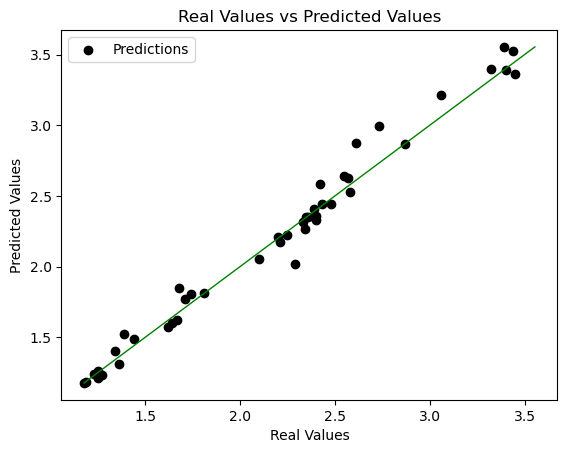

In [27]:
# Linear Regression Model
x = final_data.drop('Close_next_1day', axis=1)
y = final_data['Close_next_1day']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train) 

pred = lr_model.predict(X_test[0:])

df_compare=pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': pred})

# Calculate R-squared (R²)
r2 = r2_score(y_test, pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# Print the metrics
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot
plt.scatter(y_test, pred, color='black', label='Predictions')
# Add a 45-degree line (y = x)
min_val = min(min(y_test), min(pred))
max_val = max(max(y_test), max(pred))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='-', linewidth=1)

# Customize the plot
plt.title('Real Values vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')

### Classification: Logistic Regression

#### Data set preparation

In [ ]:
df_log_data = final_data.copy()

def updown_nextDay(row):
    if row['Close_next_1day'] > row['Close']:
        return 1
    else:
        return 0

# Apply the function to each row
df_log_data['nextDay_updown'] = df_log_data.apply(updown_nextDay, axis=1)

df_log_data = df_log_data.drop('Close_next_1day', axis=1)

In [ ]:
X = df_log_data.drop('nextDay_updown', axis=1)
y = df_log_data['nextDay_updown']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Train a logistic regression model
# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict the test set
#y_pred = xgb_model.predict(X_test)
y_pred = rf_model.predict(X_test)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tn, fp, fn, tp, accuracy, f1